# Movie Recommendation System Using Clustering

In [1]:
#Start by importing the standard libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

#suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [13]:
#Libraries related to clustering
from sklearn import preprocessing
from sklearn.metrics import pairwise
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans
from pandas.plotting import parallel_coordinates
from sklearn.metrics import silhouette_score

In [3]:
#Load the dataset
movies = pd.read_csv('MoiveLens.csv')
movies.head()

,ID,Title,ReleaseDate,VideoReleaseDate,IMDB,Unknown,Action,Adventure,Animation,Childrens,...,Fantasy,FilmNoir,Horror,Musical,Mystery,Romance,SciFi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-95,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-95,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-95,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-95,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-95,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [4]:
#Remove ID, ReleaseDate, VideoReleaseDate and IMDB attributes as they are unique and doesn't add much value to clustering
movies.drop('ID', axis =1, inplace = True)
movies.drop('ReleaseDate', axis =1, inplace = True)
movies.drop('VideoReleaseDate', axis =1, inplace = True)
movies.drop('IMDB', axis =1, inplace = True)

In [5]:
#Check once again
movies.head()

,Title,Unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,Musical,Mystery,Romance,SciFi,Thriller,War,Western
0,Toy Story (1995),0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,GoldenEye (1995),0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,Four Rooms (1995),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,Get Shorty (1995),0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,Copycat (1995),0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [6]:
#Shape of the table
movies.shape

(1682, 20)

In [7]:
#itseems there are some duplicate entries. Let's remove them as well
movies.drop_duplicates(inplace=True)
movies.shape

(1664, 20)

In [8]:
#Set the movie name as the index for all the purpose
movies.set_index('Title', inplace = True)

In [ ]:
#If you want scale your dataset... use preprocessing.scale. 
#However in this dataset all are of same scale. So not to worry
#movies_norm = movies.apply(preprocessing.scale, axis = 0)

In [9]:
#Let's check the datasaet one last time
movies.head()

,Unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,Musical,Mystery,Romance,SciFi,Thriller,War,Western
Title,,,,,,,,,,,,,,,,,,,
Toy Story (1995),0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
GoldenEye (1995),0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
Four Rooms (1995),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
Get Shorty (1995),0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
Copycat (1995),0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


## Hierarchical/Agglomerative Clustering

In [11]:
# linkage function in Scipy.cluster.hierarchy can be used for hierarchical/agglomerative clustering
# Method attribute is used to calculate the distance between clusters
# minimum distance: single; maximum distance: complete; centroid distance: centroid; Ward variance minimization: ward

Z = linkage(movies, method = 'single')

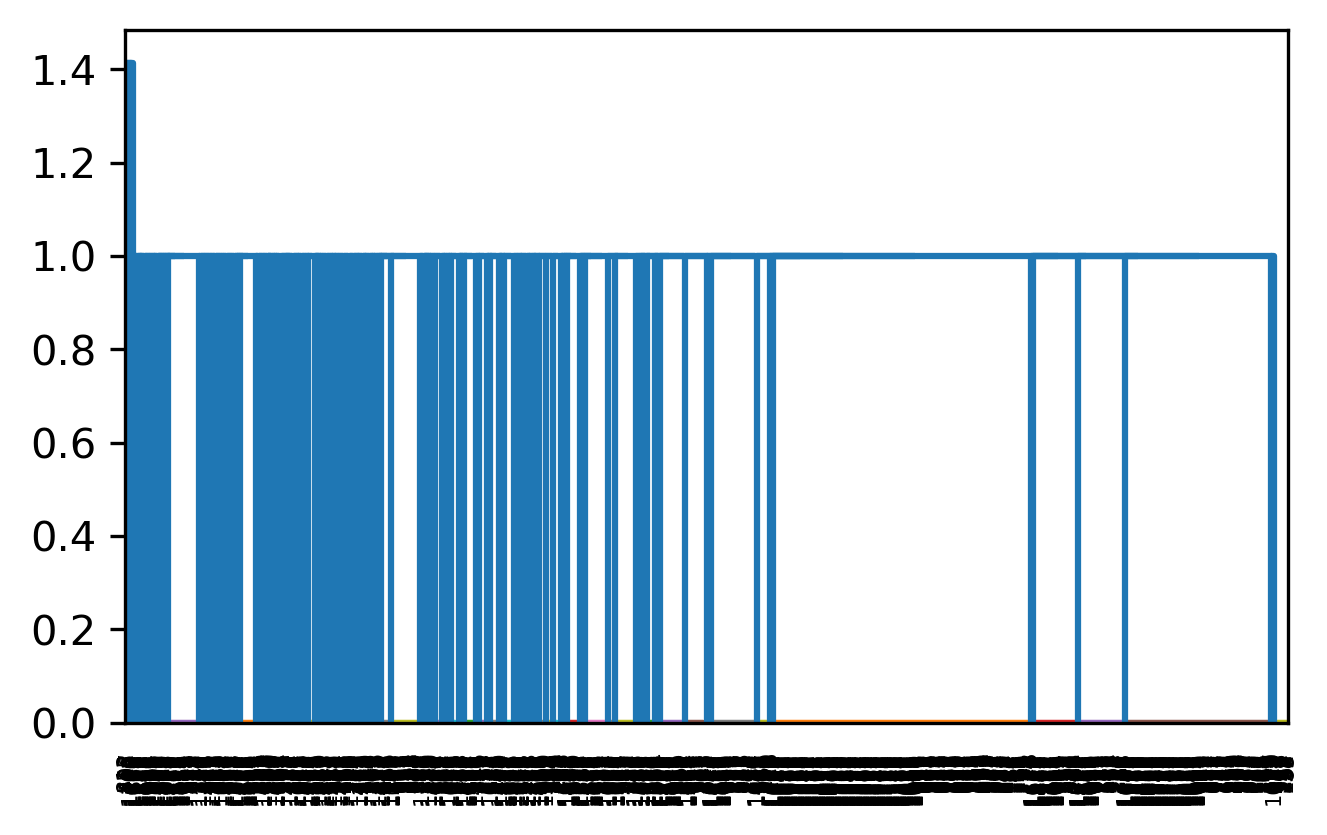

In [14]:
#dendrogram function can be used to plot the dendrogram
plt.figure(figsize=(5,3), dpi = 300)
dendrogram(Z)
plt.show()

In [19]:
#It seems, 'single' is not producing a tree than can be interpreted visually
#Let's try with 'ward' or 'centroid' distance
Z = linkage(movies, method ='ward' )

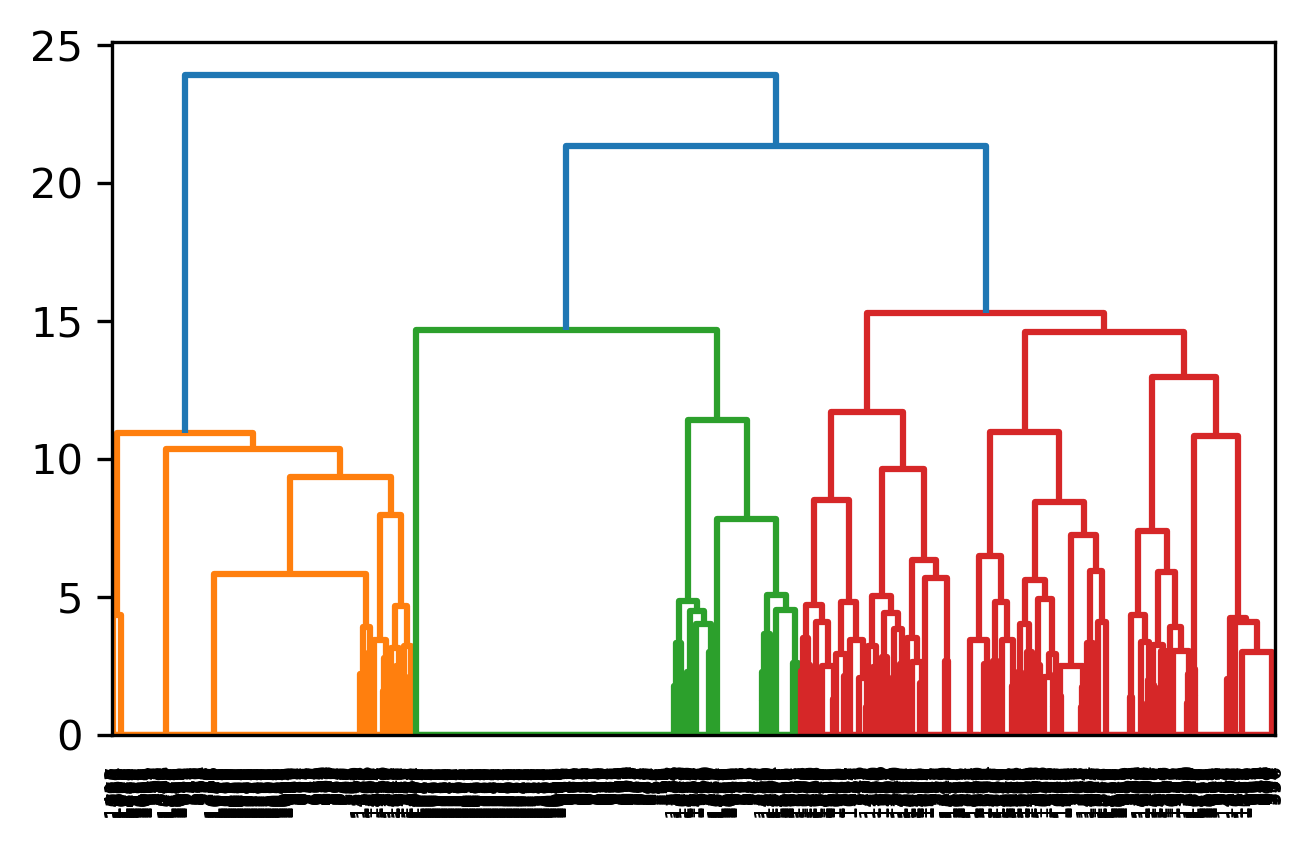

In [20]:
#Plot it
plt.figure(figsize=(5,3), dpi = 300)
dendrogram(Z)
plt.show()

### How many clusters can be made for the above dedrogram?

In [21]:
# use 'fcluster' to form flat clusters from the hierarchical clustering defined by the given linkage matrix.
# also mention how many clusters you want. Let's say 10
#Maxclust attribute will create maximum number of clusters possible. Here, the second attribute '10' defines that for us
memb = fcluster(Z, 10, criterion = 'maxclust')
memb

array([9, 5, 8, ..., 4, 1, 2], dtype=int32)

In [22]:
#add movie index
memb = pd.Series(memb, index = movies.index )
memb

Title
Toy Story (1995)                             9
GoldenEye (1995)                             5
Four Rooms (1995)                            8
Get Shorty (1995)                            1
Copycat (1995)                               7
                                            ..
Sweet Nothing (1995)                         2
Mat' i syn (1997)                            2
B. Monkey (1998)                             4
You So Crazy (1994)                          1
Scream of Stone (Schrei aus Stein) (1991)    2
Length: 1664, dtype: int32

In [23]:
#add cluster numbers to movie df and store it into new_mov df
new_mov = movies
new_mov['memb'] = memb

In [24]:
new_mov.head()

,Unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,Musical,Mystery,Romance,SciFi,Thriller,War,Western,memb
Title,,,,,,,,,,,,,,,,,,,,
Toy Story (1995),0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,9
GoldenEye (1995),0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,5
Four Rooms (1995),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,8
Get Shorty (1995),0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
Copycat (1995),0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,7


In [26]:
#Let's check the cluster weight of Action movies based on clusters
pd.pivot_table(new_mov, index='memb',values='Romance',aggfunc=np.mean)

,Romance
memb,
1,0.207852
2,0.000000
3,0.196721
4,1.000000
5,0.000000
6,0.000000
7,0.057971
8,0.068323
9,0.045455


In [27]:
#Let's check the cluster weights of Romance movies based on clusters
pd.pivot_table(new_mov, index='memb',values=movies,aggfunc=np.mean)

,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,Musical,Mystery,Romance,SciFi,Thriller,Unknown,War,Western
memb,,,,,,,,,,,,,,,,,,,
1,0.064665,0.027714,0.000000,0.009238,0.921478,0.002309,0.000000,0.210162,0.000000,0.000000,0.004619,0.080831,0.000000,0.207852,0.006928,0.002309,0.000000,0.004619,0.055427
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.196721,0.049180,0.016393,0.016393,0.163934,0.000000,0.016393,0.590164,0.000000,0.000000,0.000000,0.000000,0.000000,0.196721,0.049180,0.081967,0.000000,1.000000,0.016393
4,0.173554,0.107438,0.000000,0.008264,0.016529,0.016529,0.000000,0.595041,0.000000,0.008264,0.000000,0.000000,0.000000,1.000000,0.024793,0.099174,0.000000,0.033058,0.000000
5,0.510417,0.968750,0.041667,0.364583,0.010417,0.000000,0.000000,0.104167,0.093750,0.000000,0.000000,0.031250,0.020833,0.000000,0.270833,0.197917,0.020833,0.000000,0.020833
6,0.794521,0.027397,0.006849,0.000000,0.061644,0.047945,0.000000,0.212329,0.000000,0.000000,0.095890,0.000000,0.000000,0.000000,0.369863,0.383562,0.000000,0.027397,0.000000
7,0.202899,0.086957,0.000000,0.000000,0.173913,1.000000,0.000000,0.478261,0.000000,0.000000,0.028986,0.000000,0.014493,0.057971,0.014493,0.202899,0.000000,0.000000,0.000000
8,0.037267,0.000000,0.000000,0.012422,0.111801,0.167702,0.000000,0.316770,0.006211,0.142857,0.012422,0.000000,0.354037,0.068323,0.037267,0.801242,0.000000,0.000000,0.000000
9,0.034091,0.022727,0.409091,0.875000,0.454545,0.011364,0.000000,0.159091,0.136364,0.000000,0.000000,0.204545,0.000000,0.045455,0.045455,0.011364,0.000000,0.000000,0.000000


In [30]:
#Let's generate weights of all genere and store it into a df
mov_weights = pd.pivot_table(new_mov, index='memb',values=movies,aggfunc=np.mean)
mov_weights

,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,Musical,Mystery,Romance,SciFi,Thriller,Unknown,War,Western
memb,,,,,,,,,,,,,,,,,,,
1,0.064665,0.027714,0.000000,0.009238,0.921478,0.002309,0.000000,0.210162,0.000000,0.000000,0.004619,0.080831,0.000000,0.207852,0.006928,0.002309,0.000000,0.004619,0.055427
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.196721,0.049180,0.016393,0.016393,0.163934,0.000000,0.016393,0.590164,0.000000,0.000000,0.000000,0.000000,0.000000,0.196721,0.049180,0.081967,0.000000,1.000000,0.016393
4,0.173554,0.107438,0.000000,0.008264,0.016529,0.016529,0.000000,0.595041,0.000000,0.008264,0.000000,0.000000,0.000000,1.000000,0.024793,0.099174,0.000000,0.033058,0.000000
5,0.510417,0.968750,0.041667,0.364583,0.010417,0.000000,0.000000,0.104167,0.093750,0.000000,0.000000,0.031250,0.020833,0.000000,0.270833,0.197917,0.020833,0.000000,0.020833
6,0.794521,0.027397,0.006849,0.000000,0.061644,0.047945,0.000000,0.212329,0.000000,0.000000,0.095890,0.000000,0.000000,0.000000,0.369863,0.383562,0.000000,0.027397,0.000000
7,0.202899,0.086957,0.000000,0.000000,0.173913,1.000000,0.000000,0.478261,0.000000,0.000000,0.028986,0.000000,0.014493,0.057971,0.014493,0.202899,0.000000,0.000000,0.000000
8,0.037267,0.000000,0.000000,0.012422,0.111801,0.167702,0.000000,0.316770,0.006211,0.142857,0.012422,0.000000,0.354037,0.068323,0.037267,0.801242,0.000000,0.000000,0.000000
9,0.034091,0.022727,0.409091,0.875000,0.454545,0.011364,0.000000,0.159091,0.136364,0.000000,0.000000,0.204545,0.000000,0.045455,0.045455,0.011364,0.000000,0.000000,0.000000


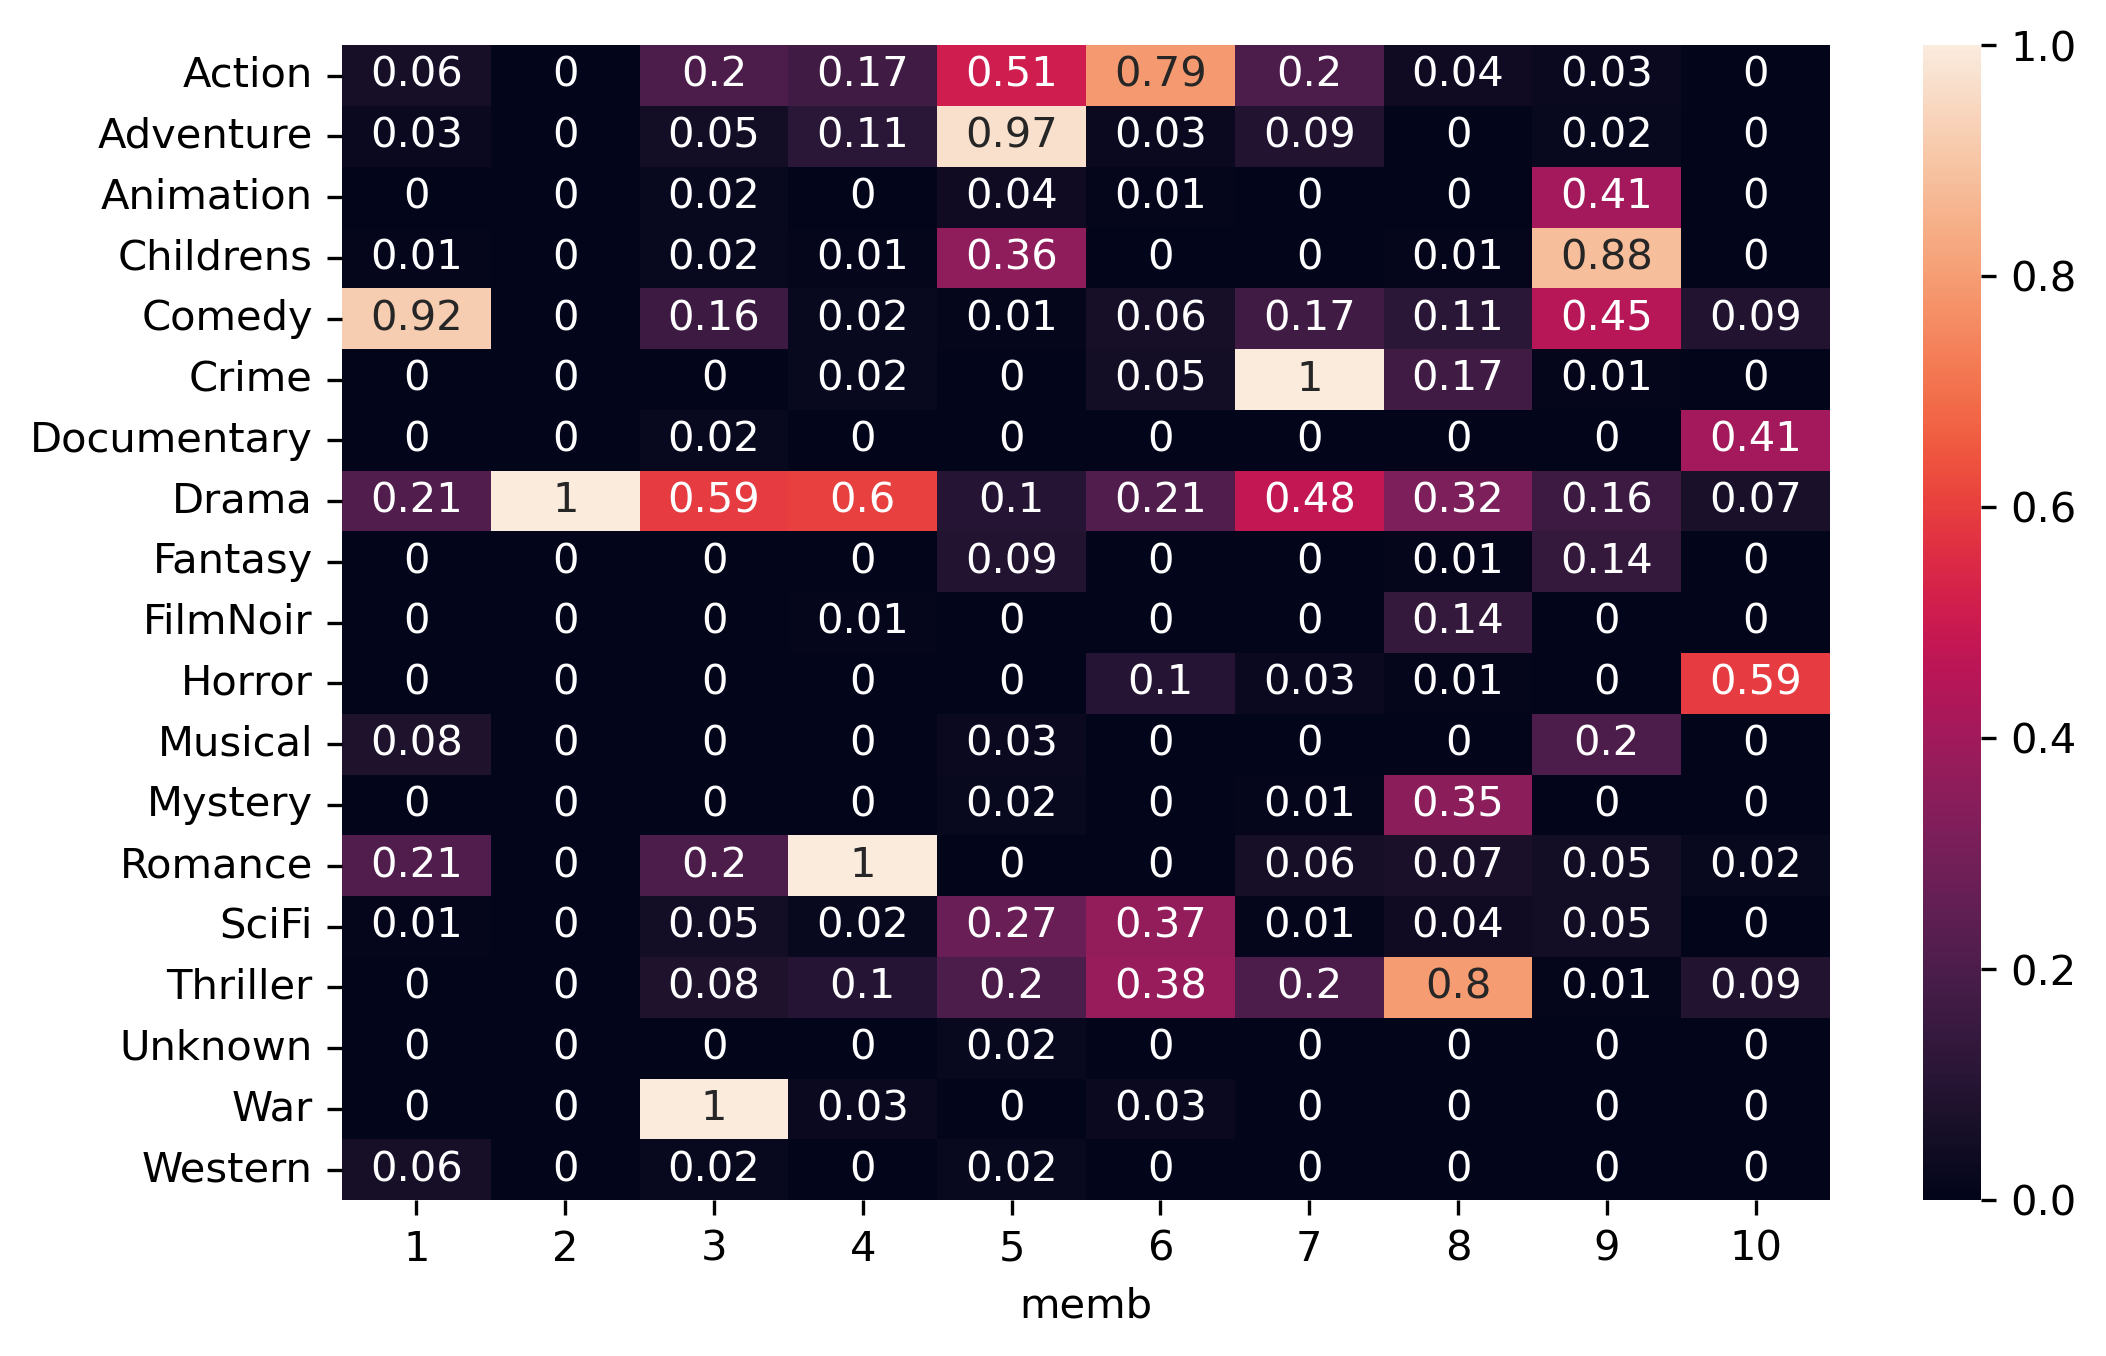

In [31]:
#now let's visualise the weights
plt.figure(figsize=(8, 5), dpi = 300)
warray = np.round(np.transpose(mov_weights), 2)
sns.heatmap(warray, annot=True)
plt.show()

In [33]:
# We can name the cluster
clust_names = ['Rom-com-drama', 'Drama', 'War-Drama', 'Romantic-Drama', 'Children-Action-Adventure', 
               'Action-SciFi-Thriller', 'Documentary-Drama', 'Thriller-Mistery-Drama', 
               'Children-Comedy-Animation', 'Horror-Documentary']

In [34]:
# We check the name of the cluster for a perticular movie
clust_names[(new_mov.loc['Toy Story (1995)']-1).memb]

'Children-Comedy-Animation'

In [35]:
#I can also check the differnt genre for the movie
new_mov.loc['Toy Story (1995)']

Unknown        0
Action         0
Adventure      0
Animation      1
Childrens      1
Comedy         1
Crime          0
Documentary    0
Drama          0
Fantasy        0
FilmNoir       0
Horror         0
Musical        0
Mystery        0
Romance        0
SciFi          0
Thriller       0
War            0
Western        0
memb           9
Name: Toy Story (1995), dtype: int64

In [36]:
#Check for the movie in your list
new_mov.loc['Truman Show, The (1998)']

Unknown        0
Action         0
Adventure      0
Animation      0
Childrens      0
Comedy         0
Crime          0
Documentary    0
Drama          1
Fantasy        0
FilmNoir       0
Horror         0
Musical        0
Mystery        0
Romance        0
SciFi          0
Thriller       0
War            0
Western        0
memb           2
Name: Truman Show, The (1998), dtype: int64

In [37]:
#Get all the movie is in that clusters
clust2 = new_mov[new_mov.memb == 2]

In [38]:
#Print first 10
clust2.index[1:10]

Index(['Dead Man Walking (1995)', 'Mr. Holland's Opus (1995)',
       'White Balloon, The (1995)', 'Antonia's Line (1995)',
       'Belle de jour (1967)', 'Nadja (1994)', 'Exotica (1994)',
       'Madness of King George, The (1994)', 'Priest (1994)'],
      dtype='object', name='Title')

#### Now you can suggest any of these movies!

# k-Means

Now Let's try k-Means clustering

In [39]:
#Use the function KMeans in SciKit learn
kmeans = KMeans(n_clusters = 10, random_state = 0)
kmeans.fit(movies)

KMeans(n_clusters=10, random_state=0)

In [40]:
#Cluster membership can be access using labels_ attribute in kemeans object
memb = pd.Series(kmeans.labels_, index = movies.index)
memb

Title
Toy Story (1995)                             9
GoldenEye (1995)                             8
Four Rooms (1995)                            4
Get Shorty (1995)                            0
Copycat (1995)                               1
                                            ..
Sweet Nothing (1995)                         5
Mat' i syn (1997)                            5
B. Monkey (1998)                             7
You So Crazy (1994)                          0
Scream of Stone (Schrei aus Stein) (1991)    5
Length: 1664, dtype: int32

In [41]:
#Add Kmeans members to new_mov df
new_mov['memb_kmean'] = memb

In [42]:
new_mov.head()

,Unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,...,Horror,Musical,Mystery,Romance,SciFi,Thriller,War,Western,memb,memb_kmean
Title,,,,,,,,,,,,,,,,,,,,,
Toy Story (1995),0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,9,9
GoldenEye (1995),0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,5,8
Four Rooms (1995),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,8,4
Get Shorty (1995),0,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
Copycat (1995),0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,1,0,0,7,1


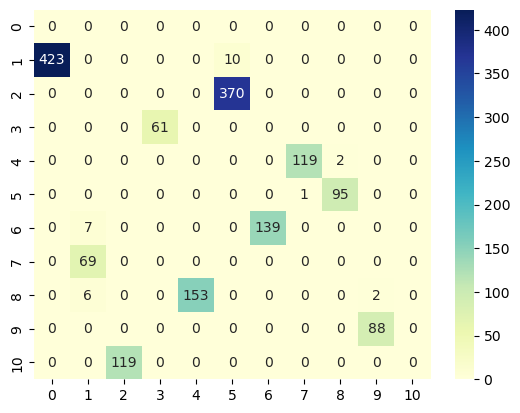

In [43]:
#now you can compare the memberships for both H-Cluster and K-means
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(new_mov['memb'],new_mov['memb_kmean'])
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

In [44]:
#Now let's predict for movies using both...

new_mov.loc['GoldenEye (1995)']
new_mov[new_mov.memb_kmean == 8].index[1:10]

Index(['Free Willy 2: The Adventure Home (1995)', 'Star Wars (1977)',
       'Stargate (1994)', 'Free Willy (1993)', 'Jurassic Park (1993)',
       'Dances with Wolves (1990)', 'Flipper (1996)', 'Rock, The (1996)',
       'Twister (1996)'],
      dtype='object', name='Title')

In [45]:
new_mov[new_mov.memb == 5].index[1:10]

Index(['Free Willy 2: The Adventure Home (1995)', 'Stargate (1994)',
       'Free Willy (1993)', 'Jurassic Park (1993)',
       'Dances with Wolves (1990)', 'Flipper (1996)', 'Rock, The (1996)',
       'Twister (1996)', 'Wizard of Oz, The (1939)'],
      dtype='object', name='Title')

#### Now you can use both of these and suggest the movie that appears in both the cluster types

### Choosing the number of clusters using Elbow method

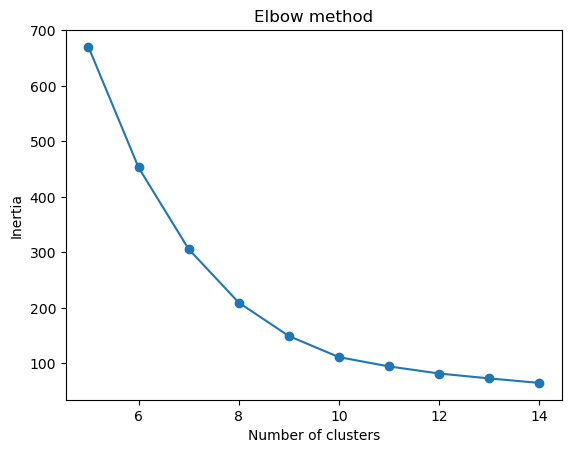

In [46]:
inertias = []

for i in range(5,15):
    kmeans = KMeans(n_clusters = i, random_state = 0)
    kmeans.fit(movies)
    inertias.append(kmeans.inertia_ / i)

plt.plot(range(5,15), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

### Evaluation

In [47]:
label=kmeans.predict(movies)
print(f'Silhouette Score(n=10): {silhouette_score(movies, label)}')

Silhouette Score(n=10): 0.6227569165895002
